# Actividad

- **Nombre**: José Andrés Lozano Alanís
- **Matrícula**: A01284569

# Entregar 
Archivo PDF de la actividad y la liga de la actividad en su repostitorio.

# Nota: 
Todas las tareas entregadas fuera de la fecha limite se califican sobre 50 de los 100 puntos posibles.


**Presion Arterial**

1. Carga los datos del archivo **presion.csv**

> Bloc con sangría



In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd 'drive/MyDrive/SemanaTec/Repos/arte-analitica'
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pana

Mounted at /content/drive
/content/drive/MyDrive/SemanaTec/Repos/arte-analitica


2. Gráfica la información en el eje de las x la edad  y en el eje y la presión


In [2]:
presion_df = pana.read_csv('data/presion.csv', )
presion_df = presion_df.iloc[:, :2:]
presion_df

,edad,presion
0,56,148
1,45,120
2,72,159
3,36,118
4,63,146
5,47,129
6,55,151
7,47,142
8,38,114
9,42,142


Text(0.5, 0, 'Edad')

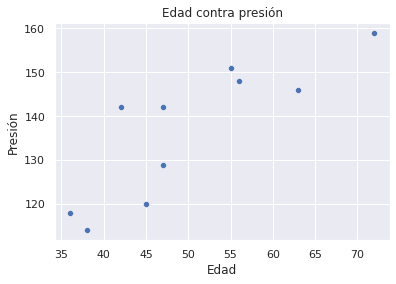

In [3]:
sns.scatterplot(data=presion_df, x='edad',y='presion')
plt.title('Edad contra presión')
plt.ylabel('Presión')
plt.xlabel('Edad')

3. Genera una regresión líneal para obtener una aproximación de la ecuación 
$$
y = ax + b
$$
donde $ a $ se conoce comúnmente como * pendiente *, y $ b $ se conoce comúnmente como * intersección *.

¿Cuál es el valor de a y cuál es el valor de b?

In [4]:
model = LinearRegression(fit_intercept=True)
x = presion_df['edad']
y = presion_df['presion']
model.fit(x[:, np.newaxis], y)
a = model.coef_[0]
b = model.intercept_
print('Valor de a:', a)
print('Valor de b:', b)

Valor de a: 1.1483331897665603
Valor de b: 79.36850719269533


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  after removing the cwd from sys.path.


4. Gráfica los datos reales vs modelo obtenido. 

Se debe visualizar los datos reales ( azules) 
Recta del modelo ( negra) 
Distancias ( verde ) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  import sys


Text(0, 0.5, 'Presión')

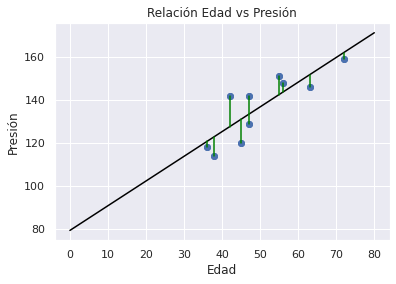

In [5]:
xfit = np.linspace(0, 80, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit, color="black");
plt.plot(x,y, 'o')
plt.plot(np.vstack([x,x]), np.vstack([y, model.predict(x[:, np.newaxis])]), color="green");
plt.title('Relación Edad vs Presión')
plt.xlabel('Edad')
plt.ylabel('Presión')

4. ¿Cuál es la presión arterial esperada para una persona de 76 años?

Genera una función que calcule lo anterior

In [6]:
edad_calcular= 76

def presion(edad):
  p_arterial = a*edad + b
  return p_arterial

print('La presión arterial de una persona de',edad_calcular, 'años es de',presion(edad_calcular))

La presión arterial de una persona de 76 años es de 166.6418296149539


# Conclusion
Como se puede ver, se puede hacer un modelo lineal simple que sea lo suficientemente preciso para las variantes de edad y presión, como para poder calcular la presión que podría tener una persona en cierta edad.

**Ventas de mi negocio**

Nuestro objetivo será contruir un modelo que prediga las ventas del producto dependiendo de cuánto presupuesto se gaste en cada medio.

1. Carga los datos del archivo AdvmiNegocio.csv

In [7]:
negocio = pana.read_csv('data/AdvmiNegocio.csv') 
negocio = negocio.iloc[:, 1::]
negocio.head()

,Redes,Youtube,TV,sales
0,6903,1134,2076,663
1,1335,1179,1353,312
2,516,1377,2079,279
3,4545,1239,1755,555
4,5424,324,1752,387


2. Generar una grafica para visuaizar  cómo se relaciona cada columna de presupuesto contra las ventas. De mi negocio. ( Redes,Youtube,TV)


Text(0.5, 0, 'Presupuesto de TV')

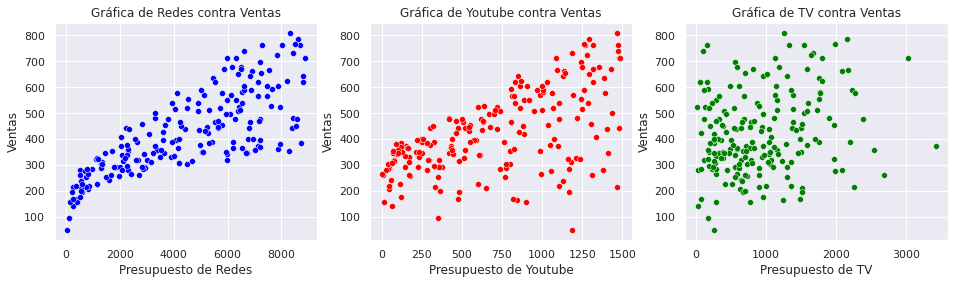

In [8]:
fig, axs = plt.subplots(1, 3, figsize=(16,4))
#Primero graficamos la de Redes
sns.scatterplot(data=negocio, x='Redes', y='sales', color='blue', ax=axs[0]) 
axs[0].set_title('Gráfica de Redes contra Ventas') 
axs[0].set_ylabel('Ventas')
axs[0].set_xlabel('Presupuesto de Redes')
# Después graficamos la de Youtube
sns.scatterplot(data=negocio, x='Youtube', y='sales', color='red', ax=axs[1]) 
axs[1].set_title('Gráfica de Youtube contra Ventas') 
axs[1].set_ylabel('Ventas')
axs[1].set_xlabel('Presupuesto de Youtube')
# Por último graficamos la de TV.
sns.scatterplot(data=negocio, x='TV', y='sales', color='green', ax=axs[2]) 
axs[2].set_title('Gráfica de TV contra Ventas')
axs[2].set_ylabel('Ventas')
axs[2].set_xlabel('Presupuesto de TV')

3. ¿ Qué conclusiones puedes obtener de las graficas anteriores?

# Conclusiones
* A medida que aumenta el presupuesto de las Redes, aumentan las ventas.
* A medida que aumenta el presupuesto de las Youtube, aumentan las ventas, pero no tal cual como la relación presupuesto de las Redes y ventas, sino con una variación más grande.
* La relación entre el presupuesto en Televisiones y las ventas no tiene sentido

*Por lo tanto la relación presupuesto de las Redes y ventas pueden tener el mejor modelo lineal, y la relación presupuesto de las TV y ventas tedría el peor modelo*.

4. **Regresión lineal**. En su forma más simple, consiste en asumir que una variable $x$ y una variable $y$ presentan una relación lineal de la forma:

$$ y \approx \beta_0 + \beta_1 \cdot x$$

¿Cuál es el valor de beta_0 , beta_1 y el Score  para Redes vs Ventas, TV vs Ventas y YouTube vs Ventas?

Redes
beta_0:  210.97780647383084
beta_1:  0.04753664043301975
Score:  0.611875050850071 



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


Text(0, 0.5, 'Ventas')

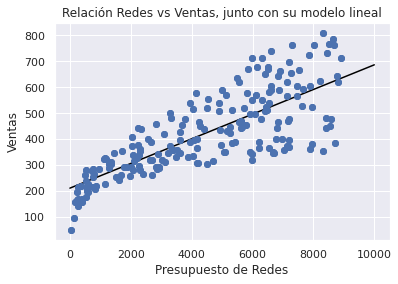

In [44]:

# Redes
lm1 = LinearRegression()
x = negocio['Redes']
y = negocio['sales']
lm1.fit(x[:, np.newaxis], y)
print('Redes')
print('beta_0: ', lm1.intercept_)
print('beta_1: ', lm1.coef_[0])
print('Score: ', lm1.score(negocio[['Redes']], negocio['sales']), '\n')

xfit = np.linspace(0, 10000, 10000)
yfit = lm1.predict(xfit[:, np.newaxis])
plt.scatter(x, y)
plt.plot(xfit, yfit, color="black");
plt.plot(x,y, 'o')

plt.title('Relación Redes vs Ventas, junto con su modelo lineal')
plt.xlabel('Presupuesto de Redes')
plt.ylabel('Ventas')


Youtube
beta_0:  279.3491428547485
beta_1:  0.20249578339243968
Score:  0.33203245544529536 



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """


Text(0, 0.5, 'Ventas')

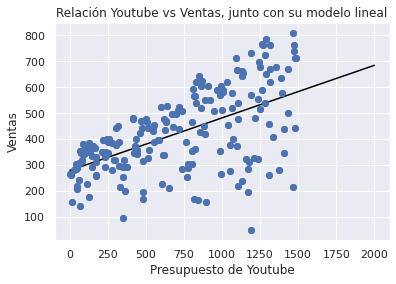

In [45]:
# Youtube
lm2 = LinearRegression()
x = negocio['Youtube']
y = negocio['sales']
lm2.fit(x[:, np.newaxis], y)
print('Youtube')
print('beta_0: ', lm2.intercept_)
print('beta_1: ', lm2.coef_[0])
print('Score: ', lm2.score(negocio[['Youtube']], negocio['sales']), '\n')

xfit = np.linspace(0, 2000, 10000)
yfit = lm2.predict(xfit[:, np.newaxis])
plt.scatter(x, y)
plt.plot(xfit, yfit, color="black");
plt.plot(x,y, 'o')

plt.title('Relación Youtube vs Ventas, junto con su modelo lineal')
plt.xlabel('Presupuesto de Youtube')
plt.ylabel('Ventas')


TV
beta_0:  370.5422120783448
beta_1:  0.05469309847227337
Score:  0.05212044544430494


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """


Text(0, 0.5, 'Ventas')

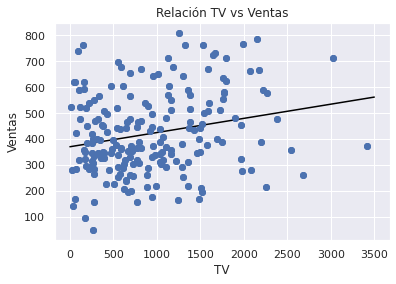

In [46]:
#TV
lm3 = LinearRegression()
x = negocio['TV']
y = negocio['sales']
lm3.fit(x[:, np.newaxis], y)
lm3.fit(negocio[['TV']], negocio['sales'])
print('TV')
print('beta_0: ', lm3.intercept_)
print('beta_1: ', lm3.coef_[0])
print('Score: ', lm3.score(negocio[['TV']], negocio['sales']))

xfit = np.linspace(0, 3500, 10000)
yfit = lm3.predict(xfit[:, np.newaxis])
plt.scatter(x, y)
plt.plot(xfit, yfit, color="black");
plt.plot(x,y, 'o')

plt.title('Relación TV vs Ventas')
plt.xlabel('TV')
plt.ylabel('Ventas')

5. ¿Cuál de los modelos es mejor de acuerdo al score ordenalos del mejor al peor?

# Mejor a peor modelo
* Redes vs Ventas
* YouTube vs Ventas
* TV vs Ventas

6.  **Regresión lineal múltiple**. Como ahora vamos a incluir más de una variable, el modelo se rescribe a :

$$ \hat{y} = \hat{\beta}_0 + \hat{\beta}_1 \cdot x_1 + \hat{\beta}_2 \cdot x_2 + \hat{\beta}_3\cdot x_3 + \ldots \epsilon $$

Elige  las diferentes combinaciones de variables. Ejemplo: Redes y Youtube vs Ventas 

¿Cuál es el valor de beta_0, betas_1 , beta_2 , el score y el score ajustado?



In [10]:
def score_neg(X, y, model):
    return 1 - (1-model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)
# Redes  y Youtube
lm4 = LinearRegression()
lm4.fit(negocio[['Redes','Youtube']], negocio['sales'])
print('Redes y Youtube')
print('beta_0: ', lm4.intercept_)
print('beta_1: ', lm4.coef_[0])
print('beta_2: ', lm4.coef_[1])
print('Score: ', lm4.score(negocio[['Redes', 'Youtube']], negocio['sales']), '\n')
print('Score ajustado:', score_neg(negocio[['Redes', 'Youtube']],
                                   negocio['sales'], lm4), '\n')

# Redes y TV
lm5 = LinearRegression()
lm5.fit(negocio[['Redes','TV']], negocio['sales'])
print('Redes y TV')
print('beta_0: ', lm5.intercept_)
print('beta_1: ', lm5.coef_[0])
print('beta_2: ', lm5.coef_[1])
print('Score: ', lm5.score(negocio[['Redes','TV']], negocio['sales']), '\n')
print('Score ajustado:', score_neg(negocio[['Redes', 'TV']],
                                   negocio['sales'], lm5), '\n')

# Youtube y TV
lm6 = LinearRegression()
lm6.fit(negocio[['Youtube','TV']], negocio['sales'])
print('Youtube y TV')
print('beta_0: ', lm6.intercept_)
print('beta_1: ', lm6.coef_[0])
print('beta_2: ', lm6.coef_[1])
print('Score: ', lm6.score(negocio[['Youtube','TV']], negocio['sales']), '\n')
print('Score ajustado:', score_neg(negocio[['Youtube', 'TV']], 
                                   negocio['sales'], lm6), '\n')

## Ahora vamos a comparar el modelo con las tres variables
lm7 = LinearRegression()
lm7.fit(negocio[['Redes','Youtube','TV']], negocio['sales'])
print('Redes, Youtube y TV')
print('beta_0: ', lm7.intercept_)
print('beta_1: ', lm7.coef_[0])
print('beta_2: ', lm7.coef_[1])
print('beta_3: ', lm7.coef_[2])
print('Score: ', lm7.score(negocio[['Redes','Youtube','TV']], negocio['sales']), '\n')
print('Score ajustado:', score_neg(negocio[['Redes','Youtube', 'TV']], 
                                   negocio['sales'], lm7))

Redes y Youtube
beta_0:  87.63299737215414
beta_1:  0.045754815101076145
beta_2:  0.1879942266203092
Score:  0.8971942610828956 

Score ajustado: 0.8961505479974428 

Redes y TV
beta_0:  173.24843903734896
beta_1:  0.04690121389190708
beta_2:  0.04421942424519284
Score:  0.6458354938293271 

Score ajustado: 0.6422399150864777 

Youtube y TV
beta_0:  275.66761377589694
beta_1:  0.19904459389696902
beta_2:  0.006644174523281712
Score:  0.33270518395032256 

Score ajustado: 0.3259306172899198 

Redes, Youtube y TV
beta_0:  88.16668108378224
beta_1:  0.045764645455397615
beta_2:  0.1885300169182045
beta_3:  -0.001037493042476273
Score:  0.8972106381789521 

Score ajustado: 0.8956373316204667


7.  ¿Cuál modelo es el que nos conviene elegir?

# Conclusion
*El modelo de Redes y Youtube vs Ventas, ya que es la que tiene el score ajustado más alto, por lo que los calculos serían más precisos, y aunque el score ajustado de Redes, Youtube y TV vs Ventas es muy parecido, esto es porque las variables Redes y Youtube son muy buenas, por lo que opacan lo malo que es la variable TV, y al eliminar esta última tendríamos un modelo más eficiente*.